Team # 21
Proposal #1: How the COVID-19 pandemic has affected both air quality and single useplastic waste

Problem Statement:

Air quality has a major impact on human health and plastic waste has an even more majorimpact on the health of the planet. Now with the covid-19 pandemic grinding businesses,airlines and other CO2 producers to a halt, alongside the enforced use of disposable personalprotective equipment and otherwise avoidable single use plastic, levels may have changed.


Which question(s) do you want to explore? Why do you think this particular question is interesting?: 

Using data from the US, we intend to investigate air quality over time. We want to discoverwhether there has been a change in air quality since covid-19 hit, given the abrupt shift thepandemic has forced on the daily lives of citizens and businesses alike. We’d similarly like toexplore plastic production for the same period, as it’s possible that these two things are linked.We will incorporate CO2 emissions data from an earlier period and data on transportation todetermine whether these may be associated with air quality, and whether there has been anysimilar shift in plastic production given covid-19.We think these topics are both highly important and highly relevant to the present time, givenhow air quality can impact human health, in particular in the presence of a respiratory illness,and how plastic pollution has been highlighted as a growing problem that needs to be solved,but may have been set back given the covid-19 crisis and need for single-use items in theinterests of hygiene. We think that any insight in these crucial areas would be important.


Which datasets do you plan to use? Why? Are there any data sources that you havefailed to find? 

Federal Reserve Bank of St. Louis Plastic Manufacturing Dataset
https://fred.stlouisfed.org/searchresults/?st=plastic&t=plastics%3Bmonthly%3Btrade&rt=trade&ob=sr
United States Environmental Protection Agency Air Quality Tracker Dataset
https://www.epa.gov/outdoor-air-quality-data/air-data-daily-air-quality-tracker
U.S. Energy Information Administration: Energy-Related CO2 Emission Data Tables (1990 -2017)
https://www.eia.gov/environment/emissions/state/
U.S. Dept of Transportation: Monthly Transportation Statistics
https://data.bts.gov/Research-and-Statistics/Monthly-Transportation-Statistics/crem-w557


Please describe the plan or methodology that you will use to answer your question.

To explore the air quality and amount of plastic waste over time we will use exploratory dataanalysis, data visualisation and time-series analyses. We will focus on the explanatory variablesmentioned to see the effect of these on the outcome variables air quality and plastic production.

First need to load packages.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels
from scipy import stats

Firstly I will look at plastics.

# PLASTIC ANALYSIS

Load the data:

In [3]:
plastics_product = pd.read_csv("plastics_product.csv")
plastics_rubber = pd.read_csv("plastics_rubber_products.csv")
plastics_material = pd.read_csv("plastics_material_resin.csv")

Look at them in turn:

In [4]:
plastics_product.head()

,DATE,IPG3261S
0,1972-01-01,25.5545
1,1972-02-01,25.8336
2,1972-03-01,26.1044
3,1972-04-01,26.3924
4,1972-05-01,26.6673


In [5]:
plastics_rubber.head()

,DATE,IPG326S
0,1972-01-01,37.1176
1,1972-02-01,37.0592
2,1972-03-01,37.4947
3,1972-04-01,38.5793
4,1972-05-01,39.0903


In [6]:
plastics_material.head()

,DATE,IPN325211S
0,1972-01-01,38.9872
1,1972-02-01,38.8303
2,1972-03-01,40.1707
3,1972-04-01,40.5691
4,1972-05-01,41.0615


Looks good as all simple time series, with no other variables other than the relevant one, since 1972 to present. Maybe look at how recent the data is:

In [7]:
plastics_product.tail()

,DATE,IPG3261S
579,2020-04-01,93.4854
580,2020-05-01,96.1689
581,2020-06-01,104.9038
582,2020-07-01,104.4437
583,2020-08-01,108.6409


In [9]:
plastics_rubber.tail()

,DATE,IPG326S
579,2020-04-01,82.7844
580,2020-05-01,86.5071
581,2020-06-01,97.2125
582,2020-07-01,99.0492
583,2020-08-01,102.7005


In [10]:
plastics_material.tail()

,DATE,IPN325211S
578,2020-03-01,103.5077
579,2020-04-01,98.8393
580,2020-05-01,98.9222
581,2020-06-01,103.1997
582,2020-07-01,101.5388


Monthly until July or August 2020. So can see when changed. Could make datasets more recent: have 2019 - march 2020, then after march 2020.

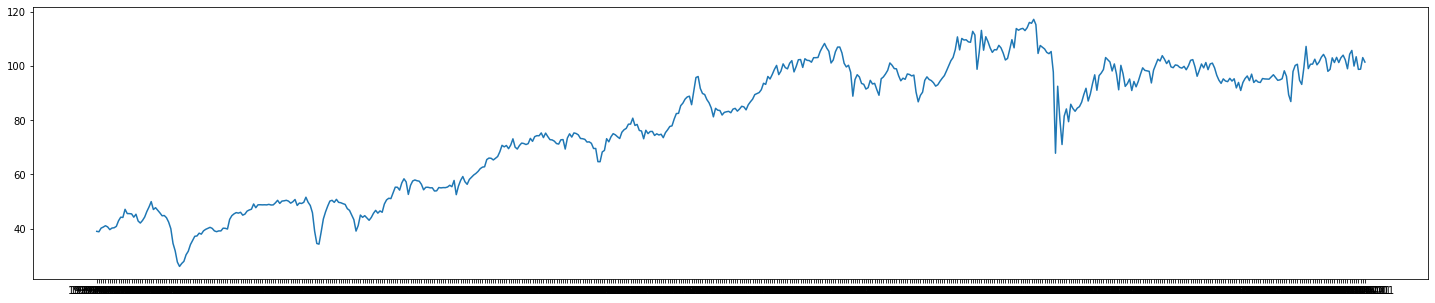

In [8]:
plt.figure(figsize=(25, 5))
plt.plot(plastics_material["DATE"], plastics_material["IPN325211S"])

In [9]:
plastics_recent = plastics_material[plastics_material['DATE'] >= '2017-01-01']

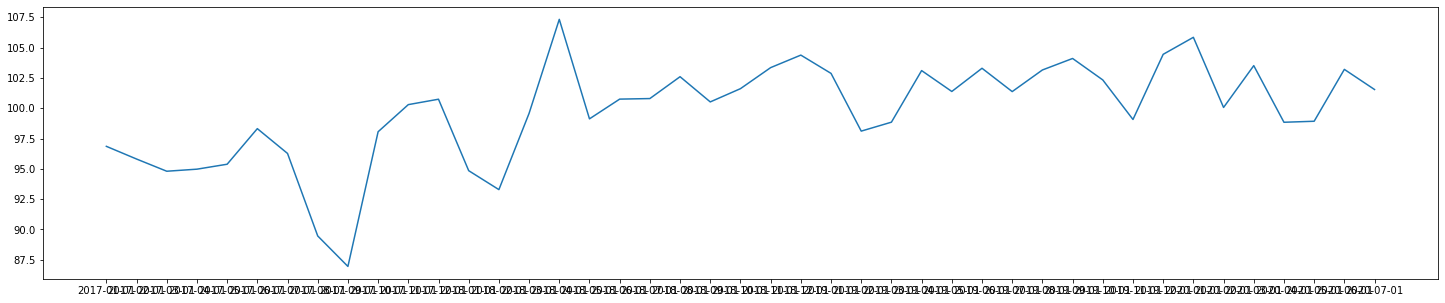

In [10]:
plt.figure(figsize=(25, 5))
plt.plot(plastics_recent["DATE"], plastics_recent["IPN325211S"])

Now we can merge these data then look at the results

In [11]:
# merge the datasets
merged_plastics = pd.merge(left = plastics_material,
                          right = plastics_product,
                          on = ["DATE"],
                          how = "inner")
merged_plastics = pd.merge(left = merged_plastics,
                          right = plastics_rubber,
                          on = ["DATE"],
                          how = "inner")
merged_plastics_recent = merged_plastics[merged_plastics['DATE'] >= '2019-01-01']

In [12]:
merged_plastics_recent.head()

,DATE,IPN325211S,IPG3261S,IPG326S
564,2019-01-01,102.8679,114.9581,110.6636
565,2019-02-01,98.1094,114.6455,110.3645
566,2019-03-01,98.8460,112.4300,108.9489
567,2019-04-01,103.1001,110.9030,106.9014
568,2019-05-01,101.3773,112.8636,108.2672


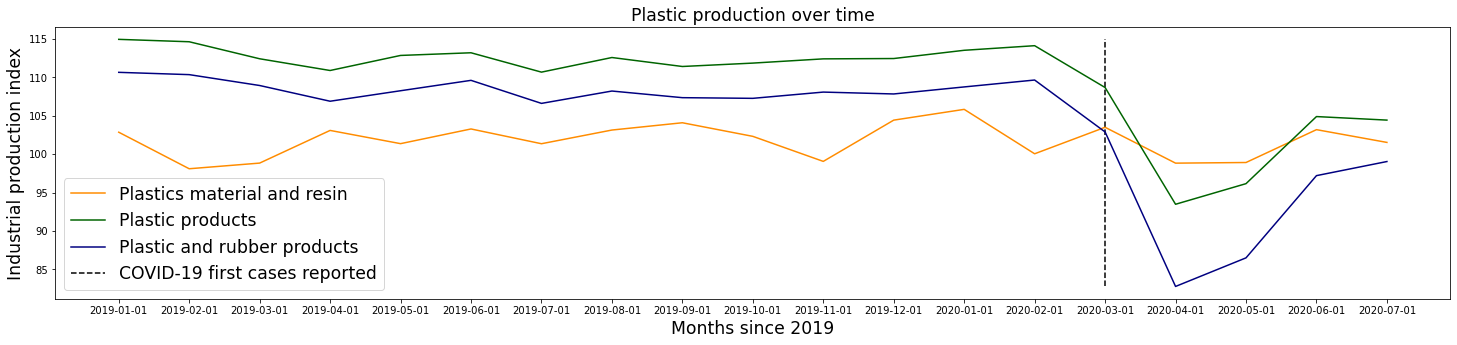

In [13]:
# rename the columns for ease of reading
merged_plastics_recent.columns = ['DATE', 'plastics_material', 'plastics_product', 'plastics_rubber']

# create min and max values for the dotted line
min_v = merged_plastics_recent[['plastics_material', 'plastics_product', 'plastics_rubber']].min()
max_v = merged_plastics_recent[['plastics_material', 'plastics_product', 'plastics_rubber']].max()

# graph
plt.figure(figsize=(25, 5))
plt.plot(merged_plastics_recent["DATE"], merged_plastics_recent["plastics_material"], color='darkorange', 
         label="Plastics material and resin")
plt.plot(merged_plastics_recent["DATE"], merged_plastics_recent["plastics_product"], color='darkgreen',
        label="Plastic products")
plt.plot(merged_plastics_recent["DATE"], merged_plastics_recent["plastics_rubber"], color='navy',
        label="Plastic and rubber products")
plt.vlines(x=['2020-03-01'], 
           ymin = min_v.min(), 
           ymax = max_v.max(), 
           colors = "black", linestyle = "--",
          label="COVID-19 first cases reported")
plt.xlabel("Months since 2019", fontsize="xx-large")
plt.ylabel("Industrial production index", fontsize="xx-large")
plt.title("Plastic production over time", fontsize="xx-large")
plt.legend(loc="lower left", fontsize="xx-large")

The Y-axis shows the industrial production (IP) index measures the real output of plastic. Here we see a dramatic drop after COVID-19 hit the US.